**Alexnet implementation without batch normalization and adaptive learning rates**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

**Loading the dataset**

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [4]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

**Visualising images**

In [5]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

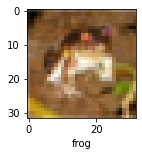

In [6]:
plot_sample(X_train, y_train, 0)

In [ ]:
plot_sample(X_train, y_train, 1)

**Normalizing the data**

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

**Training the model**

**ANN(Artificial Neural Network)**

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

**CNN(Convolutional Neural Network)**

In [8]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=192, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),   
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

 **Model summary**

In [ ]:
cnn.summary()

In [9]:
cnn.compile(
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 70s 44ms/step - loss: 1.7794 - accuracy: 0.3445
Epoch 2/20
1563/1563 [==============================] - 69s 44ms/step - loss: 1.1410 - accuracy: 0.5959
Epoch 3/20
1563/1563 [==============================] - 68s 44ms/step - loss: 0.9397 - accuracy: 0.6729
Epoch 4/20
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7916 - accuracy: 0.7248
Epoch 5/20
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7030 - accuracy: 0.7571
Epoch 6/20
1563/1563 [==============================] - 68s 43ms/step - loss: 0.6142 - accuracy: 0.7877
Epoch 7/20
1563/1563 [==============================] - 68s 44ms/step - loss: 0.5505 - accuracy: 0.8107
Epoch 8/20
1563/1563 [==============================] - 68s 43ms/step - loss: 0.4799 - accuracy: 0.8351
Epoch 9/20
1563/1563 [==============================] - 68s 43ms/step - loss: 0.4372 - accuracy: 0.8471
Epoch 10/20
1563/1563 [==============================] - 68s 43m

**Score**

In [11]:
score = cnn.evaluate(X_test,y_test)
print(score*100)

313/313 [==============================] - 4s 13ms/step - loss: 1.6520 - accuracy: 0.7080


[1.651957392692566, 0.7080000042915344]

**Classification report ie score on each class and final score**

In [ ]:
y_pred = cnn.predict(X_test)
y_pred_class = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_class))